# Sierra Leone EDA
Exploratory Data Analysis on the Sierra Leone Bumbuna Solar Dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Load the Sierra Leone Bumbuna dataset
df_sierra_leone = pd.read_csv('notebooks/data/sierraleone-bumbuna.csv')

In [3]:
# Display the first few rows and check the columns
print(df_sierra_leone.head())
print(df_sierra_leone.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.frame.

## Summary Statistics & Missing-Value Report
Calculate summary statistics and check for missing values.

In [4]:
# Summary statistics for numeric columns
summary_stats = df_sierra_leone.describe()
print(summary_stats)

# Missing value report
missing_values = df_sierra_leone.isna().sum()
print(missing_values[missing_values > 0])  # Columns with missing values

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

## Outlier Detection & Basic Cleaning
Identify and handle outliers and missing values in key columns.

In [5]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the selected columns
z_scores = np.abs(stats.zscore(df_sierra_leone[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
outliers = (z_scores > 3).any(axis=1)

# Add outlier column to the DataFrame
df_sierra_leone['outlier'] = outliers

In [6]:
# Impute missing values with the median for numeric columns only
numeric_cols = df_sierra_leone.select_dtypes(include=[np.number]).columns
df_sierra_leone[numeric_cols] = df_sierra_leone[numeric_cols].fillna(df_sierra_leone[numeric_cols].median())


In [7]:
# Check for remaining missing values
print(df_sierra_leone.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
outlier               0
dtype: int64


In [13]:
# Export Cleaned Data
df_sierra_leone.to_csv('notebooks/data/sierra_leone_clean.csv', index=False)


## Time Series Analysis
Visualize GHI, DNI, DHI, and Tamb over time.

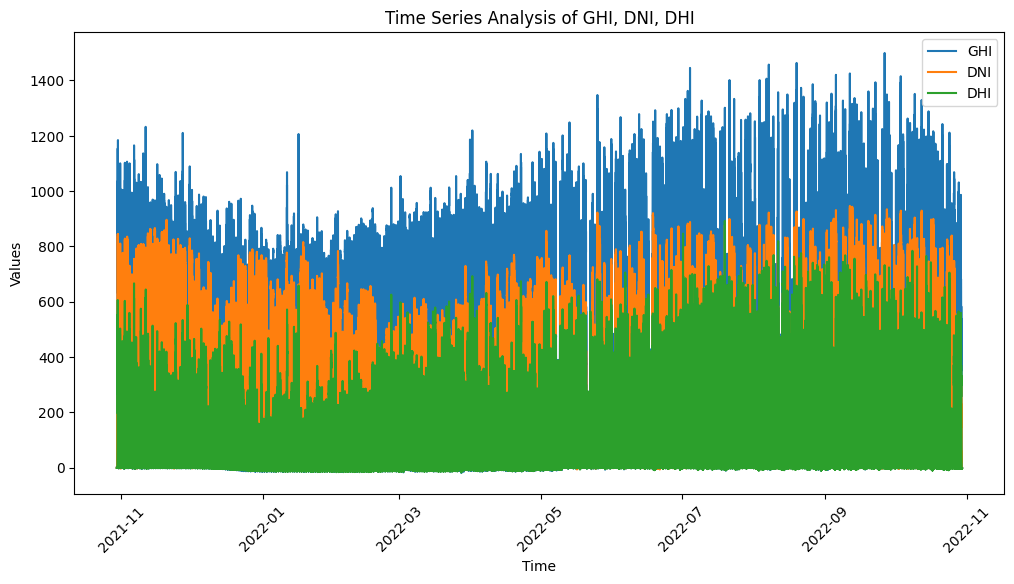

In [14]:
# Convert Timestamp to datetime
df_sierra_leone['Timestamp'] = pd.to_datetime(df_sierra_leone['Timestamp'])

# Plotting GHI, DNI, DHI, and Tamb
plt.figure(figsize=(12, 6))
plt.plot(df_sierra_leone['Timestamp'], df_sierra_leone['GHI'], label='GHI')
plt.plot(df_sierra_leone['Timestamp'], df_sierra_leone['DNI'], label='DNI')
plt.plot(df_sierra_leone['Timestamp'], df_sierra_leone['DHI'], label='DHI')
plt.title('Time Series Analysis of GHI, DNI, DHI')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Monthly Average Analysis
Resample the data to calculate monthly averages and plot the results.

C:\Users\metya\AppData\Local\Temp\ipykernel_10260\2150582653.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_sierra_leone.set_index('Timestamp').resample('M').mean()


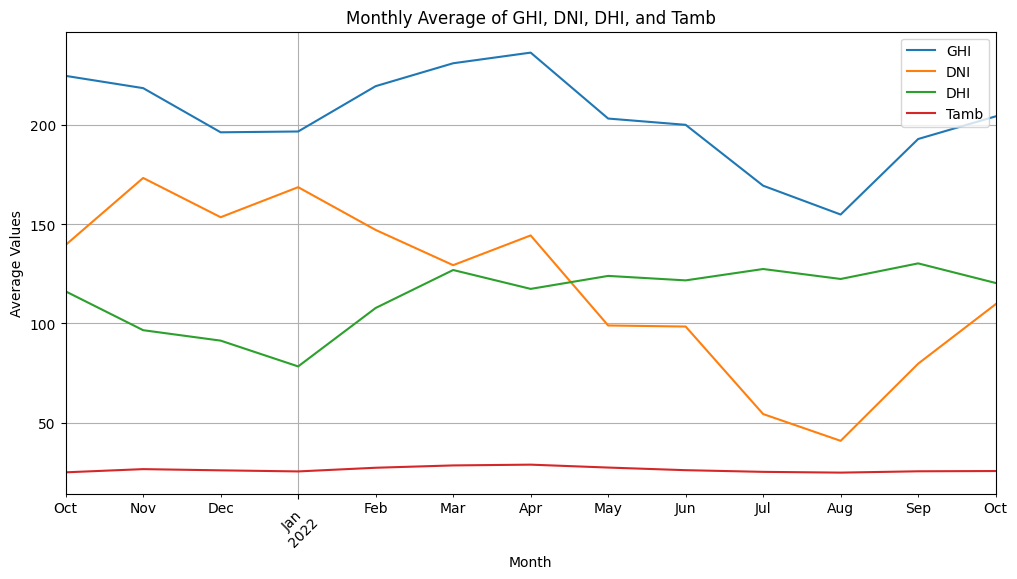

In [15]:
# Ensure 'Timestamp' is in datetime format
df_sierra_leone['Timestamp'] = pd.to_datetime(df_sierra_leone['Timestamp'])

# Set the Timestamp as the index and calculate monthly averages
monthly_avg = df_sierra_leone.set_index('Timestamp').resample('M').mean()

# Plot the monthly averages for GHI, DNI, DHI, and Tamb
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

## Hourly Average Analysis
Extract the hour from the Timestamp for daily analysis and plot the results.

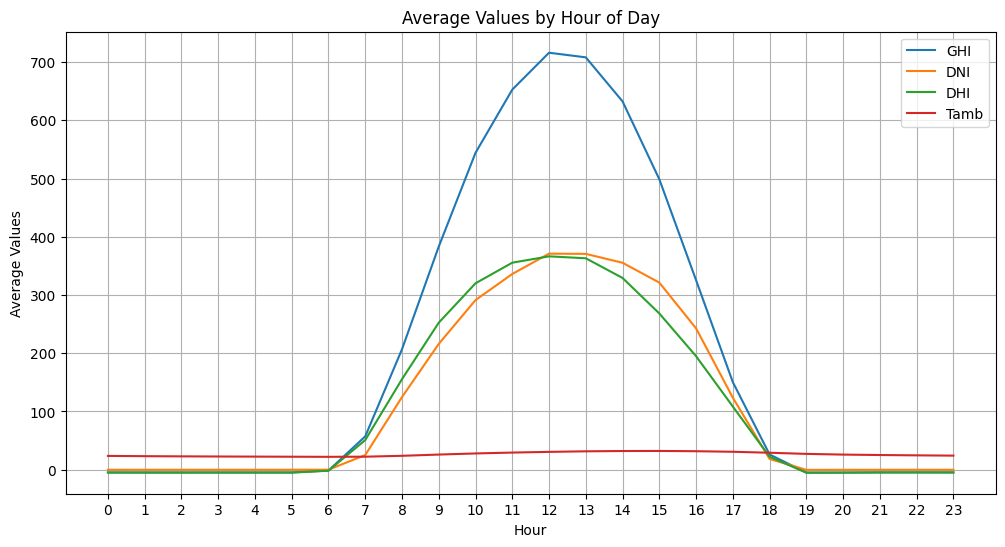

In [16]:
# Extract the hour from the Timestamp for daily analysis
df_sierra_leone['Hour'] = df_sierra_leone['Timestamp'].dt.hour

# Group by hour and calculate the average for each variable
hourly_avg = df_sierra_leone.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot the average values by hour of the day
hourly_avg.plot(kind='line', figsize=(12, 6))
plt.title('Average Values by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Values')
plt.xticks(range(24))
plt.grid()
plt.show()

## Cleaning Impact
Analyze the impact of data cleaning on ModA and ModB measurements.

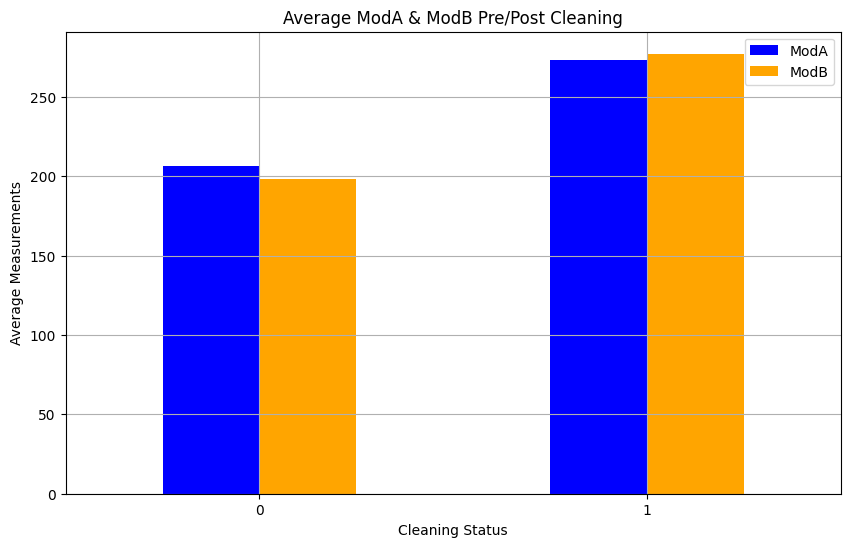

In [17]:
import matplotlib.pyplot as plt

# Group by 'Cleaning' and calculate mean for ModA and ModB
cleaned_avg = df_sierra_leone.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting the averages
cleaned_avg.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Status')
plt.ylabel('Average Measurements')
plt.xticks(rotation=0)
plt.grid()
plt.show()

## Correlation & Relationship Analysis
Explore correlations between key variables in the dataset.

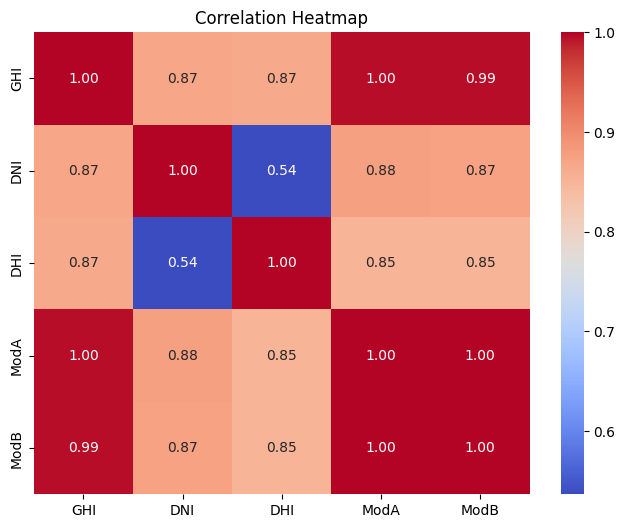

In [18]:
import seaborn as sns

# Select relevant columns for correlation analysis
correlation_matrix = df_sierra_leone[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatter Plots
Visualize relationships between wind speed, humidity, and solar irradiance.

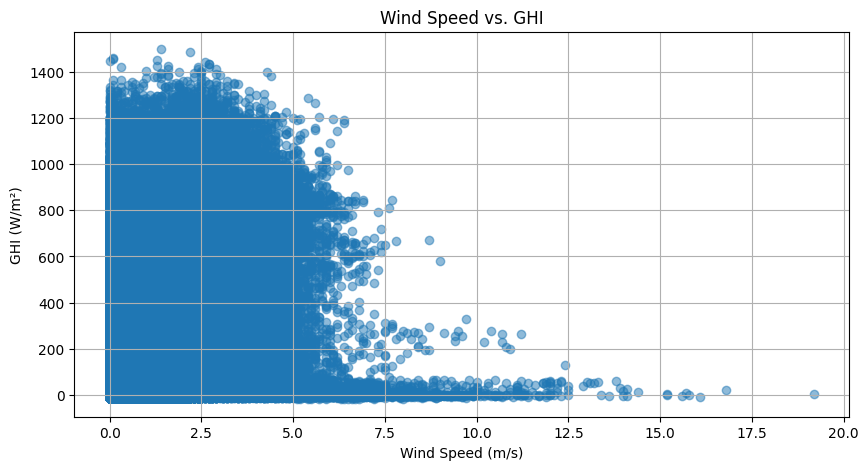

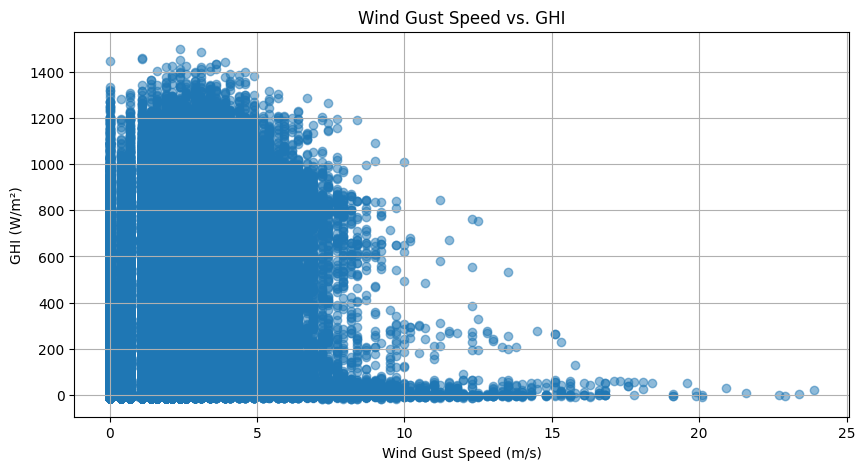

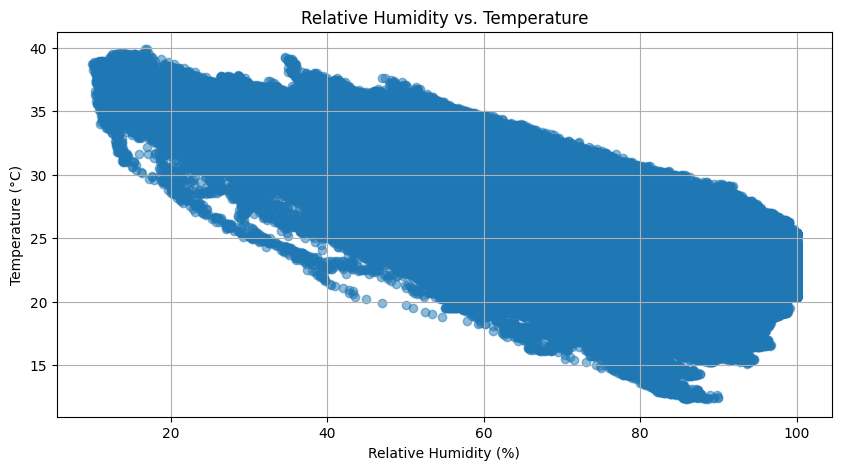

In [19]:
# WS vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_sierra_leone['WS'], df_sierra_leone['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# WSgust vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_sierra_leone['WSgust'], df_sierra_leone['GHI'], alpha=0.5)
plt.title('Wind Gust Speed vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

# RH vs. Tamb
plt.figure(figsize=(10, 5))
plt.scatter(df_sierra_leone['RH'], df_sierra_leone['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

## Wind & Distribution Analysis
Analyze wind data and visualize distributions of key variables.

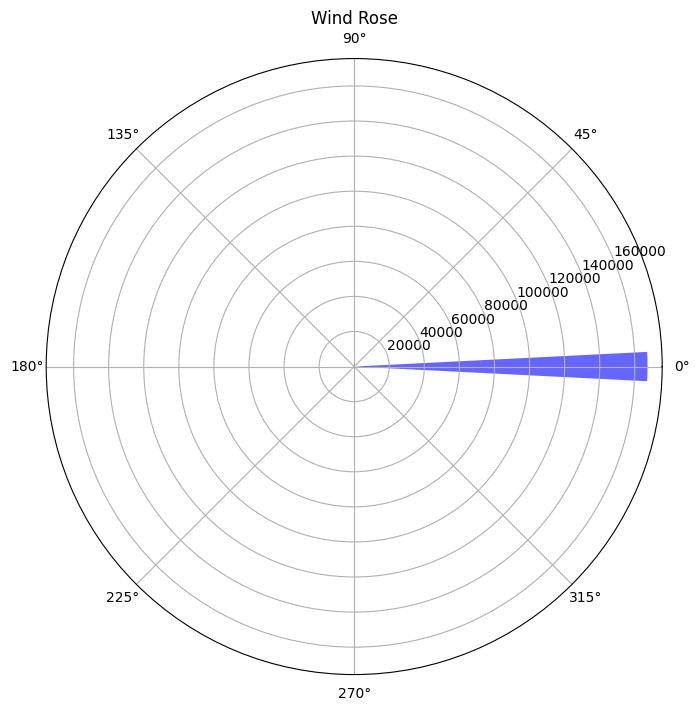

In [28]:
from math import pi

# Prepare data for wind rose
wind_data = df_sierra_leone.groupby('WD').size()
angles = wind_data.index * (2 * pi / 360)
radii = wind_data.values

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.bar(angles, radii, width=0.1, color='blue', alpha=0.6)
ax.set_title('Wind Rose')
plt.show()

### Histograms
Visualize the distribution of GHI and wind speed.

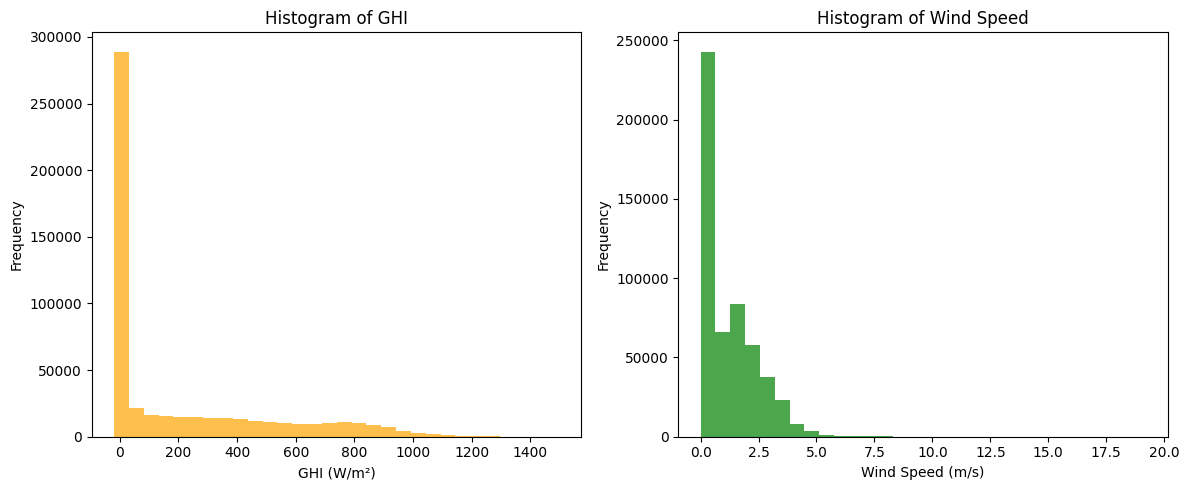

In [27]:
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df_sierra_leone['GHI'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df_sierra_leone['WS'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Temperature Analysis
Examine how relative humidity influences temperature and solar radiation.

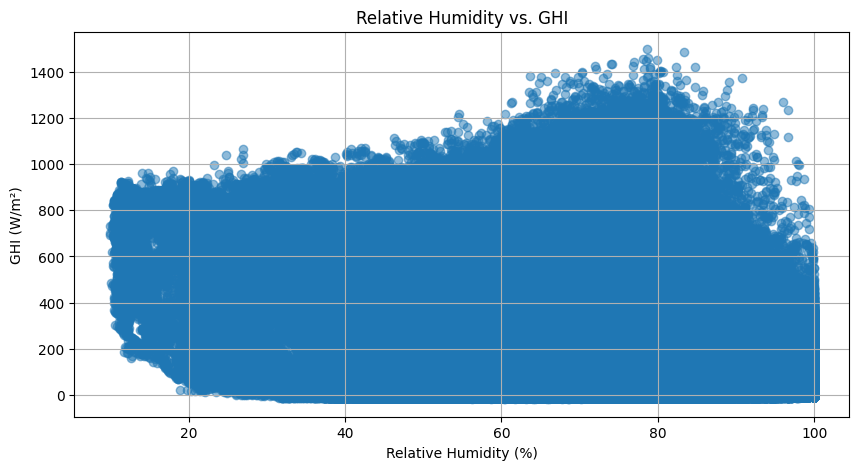

In [29]:
# Scatter plot for RH vs. GHI
plt.figure(figsize=(10, 5))
plt.scatter(df_sierra_leone['RH'], df_sierra_leone['GHI'], alpha=0.5)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()

## Bubble Chart
Visualize the relationship between GHI and temperature, with bubble size representing RH.

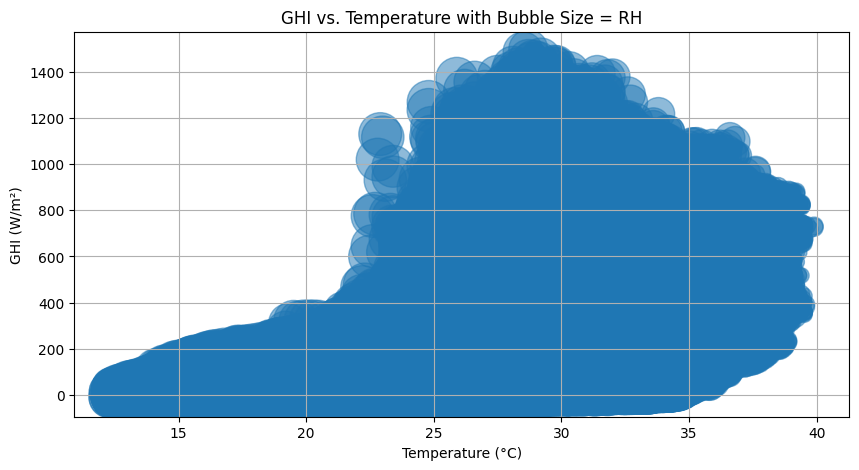

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(df_sierra_leone['Tamb'], df_sierra_leone['GHI'], s=df_sierra_leone['RH']*10, alpha=0.5)
plt.title('GHI vs. Temperature with Bubble Size = RH')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid()
plt.show()